In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/home/rushi/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv('/home/rushi/Deep Learning Projects/Bank_Churn.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df= pd.get_dummies(df, columns=['Geography','Gender'],drop_first=True)

In [15]:
df['Geography_Germany']=df['Geography_Germany'].astype(int)
df['Geography_Spain']=df['Geography_Spain'].astype(int)
df['Gender_Male']=df['Gender_Male'].astype(int)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X= df.drop(columns=['Exited'])
y=df['Exited']

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=1)

In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [23]:
X_train_trf

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-03-13 10:08:51.272750: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 10:08:51.276124: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 10:08:51.311189: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 10:08:51.311221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 10:08:51.312583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [25]:
model = Sequential()

model.add(Dense(10, activation='relu',input_dim=11))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [28]:
history= model.fit(X_train_trf,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.7714 - val_loss: 0.4637 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 0s 974us/step - loss: 0.4482 - accuracy: 0.7989 - val_loss: 0.4377 - val_accuracy: 0.8056
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8138 - val_loss: 0.4236 - val_accuracy: 0.8225
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8219 - val_loss: 0.4139 - val_accuracy: 0.8231
Epoch 5/50
200/200 [==============================] - 0s 1000us/step - loss: 0.4120 - accuracy: 0.8283 - val_loss: 0.4021 - val_accuracy: 0.8288
Epoch 6/50
200/200 [==============================] - 0s 994us/step - loss: 0.4000 - accuracy: 0.8366 - val_loss: 0.3891 - val_accuracy: 0.8369
Epoch 7/50
200/200 [==============================] - 0s 947us/step - loss: 0.3869 - accuracy: 0.8452 - val_loss: 0.3766 - val_accuracy: 0.84

In [29]:
model.layers[0].get_weights()

[array([[-0.14916363, -0.01688658, -0.04271906,  0.01519059, -0.07684388,
         -0.05148952, -0.31553668,  0.10288152,  0.10159377,  0.00425989],
        [ 0.12971725,  1.0499115 , -0.6460073 , -0.15488793, -0.08762553,
          0.6328426 , -0.6191229 , -0.28321984, -0.42993692,  0.27985278],
        [ 0.11758472,  0.08760352,  0.41248763, -0.23087601, -0.61346173,
         -0.01207045, -0.21316071, -0.43144363, -0.07109743, -0.02967829],
        [-0.27348614, -0.108657  , -0.14143695, -0.4464964 , -0.40391868,
         -0.32515877,  0.12186918, -0.05655328, -0.15437452,  0.2851863 ],
        [ 0.14658041,  0.28757608, -0.05496209,  0.07066365,  0.40864876,
         -0.865826  , -0.1925524 , -0.44514492,  0.08333672,  1.406255  ],
        [ 0.6601491 ,  0.14001603,  0.02647693,  0.56801   , -0.4107449 ,
          0.04091457,  0.0628517 , -0.02306016,  0.1272104 ,  0.1215765 ],
        [ 0.43640622,  0.92746526,  0.10277668,  0.11815376, -0.29755563,
         -0.17952155, -0.3932446

In [30]:
y_pred=model.predict(X_test_trf)

63/63 [==============================] - 0s 786us/step


In [31]:
y_pred_new= np.where(y_pred>0.5,1,0)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred_new)

0.8635

In [34]:
# history.history

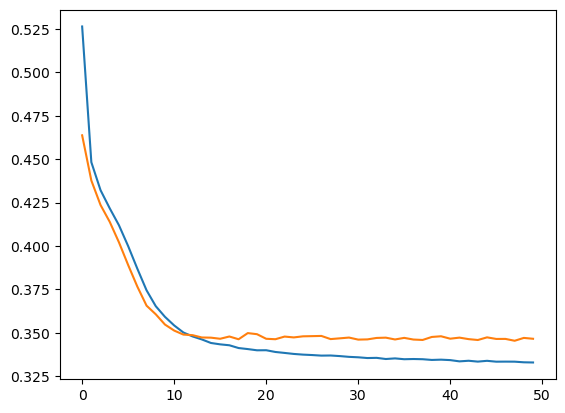

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

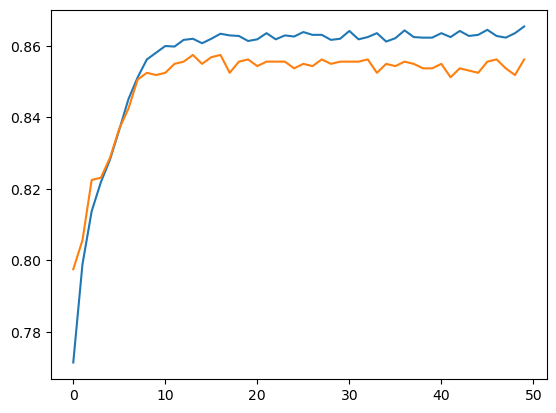

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()